<a href="https://colab.research.google.com/github/NebiyouTen/ARVR_and_imaging_tools/blob/master/stackoverlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import spacy
from spacy import displacy


nlp = spacy.load("en_core_web_sm")

corpus=['cats are selfish', 'it is raining cats and dogs', 'dogs do not like birds','i do not like rabbits','i have eaten frogs snakes and alligators']

for sent in corpus:
    sentence_nlp = nlp(sent)
    print (sentence_nlp.ents)
    # print named entities in sentences
    for a in sentence_nlp:
      print (a.lemma_)
#     print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])
    # visualize named entities
#     displacy.render(sentence_nlp, style='ent', jupyter=True)

# sentence_nlp = nlp(corpus)

In [0]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 51kB/s 
     |████████████████████████████████| 204kB 38.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=9905a508b9fa44f33a725a1393db182f552a0e7bc3fc5c61476aef7cccff5a99
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
import numpy as np
from scipy.spatial.distance import cosine
from pyspark.sql.functions import udf,array
from pyspark.sql import SparkSession

spark = SparkSession\
      .builder\
      .appName("Playground")\
      .config("spark.master", "local")\
      .getOrCreate()

@udf("float")
def myfunction(x):
    y=np.array([1,3,9])
    x=np.array(x)
    return cosine(x,y)


df = spark\
    .createDataFrame([("doc_3",1,3,9), ("doc_1",9,6,0), ("doc_2",9,9,3) ])\
    .withColumnRenamed("_1","doc")\
    .withColumnRenamed("_2","word1")\
    .withColumnRenamed("_3","word2")\
    .withColumnRenamed("_4","word3")


df2=df.select("doc", array([c for c in df.columns if c not in {'doc'}]).alias("words"))

df2=df2.withColumn("cosine",myfunction("words"))

df2.show() # The exception is thrown here

IllegalArgumentException: ignored

In [0]:
def Partition(input_array, left_index, right_index):
    pivot_value = input_array[right_index]

    i = left_index - 1
    for j in range(left_index, right_index -1):
        if input_array[j] < pivot_value:
            i = i + 1
            swap(input_array, i, j)
            

    swap(input_array, right_index, i + 1)
    print(input_array)
    return i + 1

def swap(input_array, i, j):
    input_array[i], input_array[j] = input_array[j], input_array[i]
    return input_array

In [0]:
input = [5, 3, 8, 6, 7, 4, 9, 2, 1, 10]
i = Partition(input, 0, len(input)-1)
i = Partition(input, i, len(input)-1)

[5, 3, 8, 6, 7, 4, 9, 2, 10, 1]
[5, 3, 8, 6, 7, 4, 9, 2, 1, 10]


In [0]:
def swap(lst):
  x = lst[0]
  lst[0] = lst[1]
  lst[1] = x

  
# rep = [[1,2,3],[1,2,3]]
items = ['a', 'b', 'c', 'd', 'e' ]
print (items)
del items[:] 
print (items)

['a', 'b', 'c', 'd', 'e']
[]


In [0]:
# Example Item List
items = ['a', 'b', 'c', 'd', 'e' ]


# Build Page Dictionary
page_dic = {}
page_amount = 2

page_count = 1
current_page = []

print(f'All Items: {items}')
for item in items:
    if len(current_page) == page_amount:
        print(f'To Add: {current_page}')
        page_dic[f'page_{page_count}'] = current_page
        print ("Assinged ",current_page)
        page_count += 1

        del current_page[:]
#         current_page = []
        print ("Cpase ",current_page)
        current_page.append(item)
    else:
        current_page.append(item )
#         print ("ADDed ", item)

print(f'To Add: {current_page}')
page_dic[f'page_{page_count}'] = current_page
print ()

print(f'Result: {page_dic}')

All Items: ['a', 'b', 'c', 'd', 'e']
To Add: ['a', 'b']
Assinged  ['a', 'b']
Cpase  []
To Add: ['c', 'd']
Assinged  ['c', 'd']
Cpase  []
To Add: ['e']

Result: {'page_1': ['e'], 'page_2': ['e'], 'page_3': ['e']}


In [0]:
def is_prime(n):
    msg1 = "is the multiplicative identity."
    msg2 = "is not a prime number"
    msg3 = "is a prime."
    if n == 1:
        return f'{n} {msg1}'
    for d in range(2, n):
        msg4 = f'({d} * {n // d} = {n})'
        if (n % d) == 0:
            return f'{n} {msg2} {msg4}.'
        else:
            return f'{n} {msg3}'

print(is_prime(15))

15 is a prime.


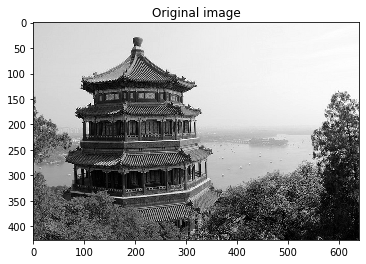

In [0]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import cv2

# get sample images form sklearn
dataset = load_sample_images()   
# concatenate the images
grayscale_image = cv2.cvtColor(dataset.images[0], cv2.COLOR_BGR2GRAY)
plt.title("Original image")
plt.imshow(grayscale_image, cmap = "gray")
patches = image.extract_patches_2d(grayscale_image, (25, 25), random_state = 42)


prijectd shape is  (248248, 3)


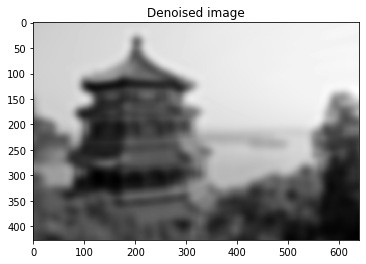

In [0]:
# create a PCA object
pca = PCA(n_components = 3,random_state = 42)
# reshape data
patches_reshaped = patches.reshape(len(patches), -1)

projected = pca.fit_transform(patches_reshaped)
print ("prijectd shape is ", projected.shape)
denoised_patches = pca.inverse_transform(projected)

# Plot the reconst images
denoised_image = image.reconstruct_from_patches_2d(denoised_patches.reshape(-1,25,25), grayscale_image.shape)
plt.title("Denoised image")
plt.imshow(denoised_image, cmap = "gray")

Project shape (248248, 3)
COmponents (3, 625)
(248248, 625)


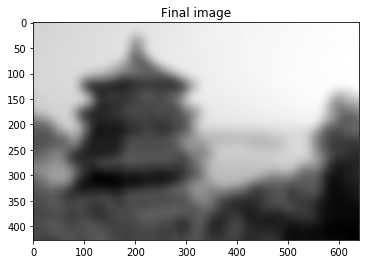

In [0]:
print ("Project shape", projected.shape)
components = pca.components_
print ("COmponents", components.shape)
# print ("First comp shae ",components.shape)
first_component = pca.components_[0].reshape(1,-1) #first component
proj = projected[:,0].reshape(-1,1)
recon_using_first_comp_1 = np.dot(proj, first_component) #+ pca.mean_
print (recon_using_first_comp.shape)
# Plot the reconst images
final_img_1 = image.reconstruct_from_patches_2d(recon_using_first_comp_1.reshape(-1,25,25), grayscale_image.shape)
plt.title("Final image")
plt.imshow(final_img, cmap = "gray")
# print (pca.mean_)

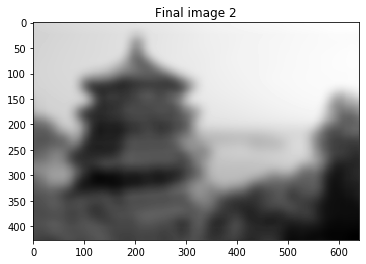

In [0]:
final_img_2 - final_img_1
# pca.mean_
plt.title("Final image 1")
plt.imshow(final_img_1, cmap = "gray")


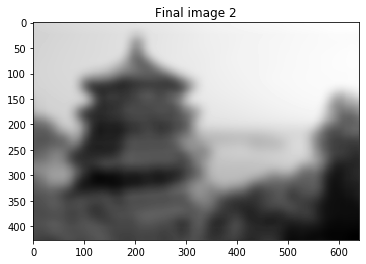

In [0]:
plt.title("Final image 2")
plt.imshow(final_img_2, cmap = "gray")

In [0]:
arr_1 = [10,10, 4,3]

    
max_val, min_val = max(arr), min(arr)
simple_lambda = lambda x: x if x != max_val else min_val
new_list = list(map(simple_lambda, arr))
print (max(new_list))
print (max(arr, key = simple_lambda))

4
4


In [0]:
from tensorflow.keras import backend as K
from keras.layers import Layer
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.layers import *
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf


def squash(s, axis=-1, epsilon=1e-7, name=None):
    squared_norm = tf.reduce_sum(tf.square(s), axis=axis, keepdims=True)
    safe_norm = tf.sqrt(squared_norm + epsilon)
    squash_factor = squared_norm / (1. + squared_norm)
    unit_vector = s / safe_norm
    return squash_factor * unit_vector


def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)


def safe_norm(s, axis=-1, epsilon=1e-7, keep_dims=False, name=None):
    squared_norm = tf.reduce_sum(tf.square(s), axis=axis, keepdims=keep_dims)
    return tf.sqrt(squared_norm + epsilon)


class Custom_layer(Layer):
    def __init__(self, **kwargs):
        super(Custom_layer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(1, 1152, 10, 16, 8),
            initializer=tf.keras.initializers.RandomNormal(0.0, stddev=0.01),
            trainable=True)

    def call(self, inputs):
        reshaped = tf.reshape(inputs, [-1, 1152, 8])
        inputs = squash(reshaped)

        u_expanded_0 = tf.expand_dims(inputs, -1)
        u_expanded_1 = tf.expand_dims(u_expanded_0, 2)

        u_tiled = tf.tile(u_expanded_1, [1, 1, 10, 1, 1])
        W_tiled = tf.tile(self.kernel, [batch_size, 1, 1, 1, 1])

        u_hat = tf.matmul(W_tiled, u_tiled)
        try:
            numpy_result = np.matmul(W_tiled.numpy(), u_tiled.numpy())
            tf.print('\n TensorFlow/numpy max element value=' + str(tf.reduce_max(u_hat).numpy()) + '/' + str(
                numpy_result.max()))
            tf.print('\n TensorFlow/numpy mean value=' + str(tf.reduce_mean(u_hat).numpy()) + '/' + str(
                numpy_result.mean()))
        except:
            pass

        soft = softmax((safe_norm(tf.reduce_sum(u_hat, axis=[1, 3]))))

        # tf.print('\n\nW_tile max=' + str(tf.reduce_max(W_tiled)))
        # tf.print('W_tile min=' + str(tf.reduce_min(W_tiled)))
        # tf.print('u_tiled max=' + str(tf.reduce_max(u_tiled)))
        # tf.print('u_tiled min=' + str(tf.reduce_min(u_tiled)))
        # tf.print('u_hat max=' + str(tf.reduce_max(u_hat)))
        # tf.print('u_hat min=' + str(tf.reduce_min(u_hat)))

        tf.debugging.check_numerics(u_tiled, 'u_tiled')
        tf.debugging.check_numerics(W_tiled, 'W_tiled')
        tf.debugging.check_numerics(u_hat, 'u_hat')
        tf.debugging.check_numerics(soft, 'soft')

        return soft

    def compute_output_shape(self, input_shape):
        return (batch_size, 10, 16)


batch_size = 128
epochs = 100
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_train /= 255
y_train = utils.to_categorical(y_train, 10)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(256, (9, 9), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(256, (9, 9), strides=(2, 2), activation='relu'))
model.add(Custom_layer())

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.run_eagerly = True
model.summary()

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs
)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 256)       20992     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 256)         5308672   
_________________________________________________________________
custom_layer (Custom_layer)  (128, 10)                 1474560   
Total params: 6,804,224
Trainable params: 6,804,224
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 sam

KeyboardInterrupt: ignored

In [0]:
import torch
import torch.nn as nn
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.argmax(outputs, dim=1)
print(output.shape, targets.shape)
print(outputs)
print (targets)
loss = ce_loss(outputs, targets)
print(loss)

torch.Size([3, 5]) torch.Size([3])
tensor([[ 0.5968, -0.8249,  1.5018,  2.7888, -0.6125],
        [-1.1534, -0.4921,  1.0688,  0.2241, -0.0257],
        [ 0.3747,  0.8957,  0.0816,  0.0745,  0.2695]], requires_grad=True)
tensor([3, 2, 1])
tensor(0.7354, grad_fn=<NllLossBackward>)


In [0]:
smax = torch.softmax(outputs,axis=1)
print(smax)

tensor([[0.0771, 0.0186, 0.1907, 0.6906, 0.0230],
        [0.0520, 0.1008, 0.4801, 0.2063, 0.1607],
        [0.1972, 0.3321, 0.1471, 0.1461, 0.1775]], grad_fn=<SoftmaxBackward>)


In [0]:
(torch.log(1/smax[0,3]) +  torch.log(1/smax[1,2]) + torch.log(1/smax[2,1])) / 3

tensor(0.7354, grad_fn=<DivBackward0>)

In [0]:
def f(x):
    return (x**4 + 3x#- 1)  # only one real root at x = 1

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

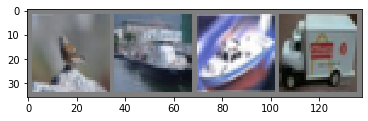

 bird  ship  ship truck


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3, padding=1, padding_mode='zeros')
        self.conv1_bn = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3, padding=1, padding_mode='zeros')
        self.conv2_bn = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, padding=1, padding_mode='zeros')
        self.conv3_bn = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64,64,3, padding=1, padding_mode='zeros')
        self.conv4_bn = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64,10,2,padding=0)
    def forward(self, x): # x has shape (4,32,32,3)
        x = self.pool(F.relu(self.conv1_bn(self.conv1(x)))) # feature map resolution is now 16*16
        x = self.pool(F.relu(self.conv2_bn(self.conv2(x)))) # resolution now 8*8
        x = self.pool(F.relu(self.conv3_bn(self.conv3(x)))) #resolution now 4*4
        x = self.pool(F.relu(self.conv4_bn(self.conv4(x)))) # now 2*2
        x = F.relu(self.conv5(x)) # The output shape is (batchsize, 1,1,10)

        return x

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
criterion = nn.CrossEntropyLoss()

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device is ",device)
net.to(device)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # I get the values as 4,1,1,10
        # print (outputs.shape)
        # outputs = outputs.view(4, -1)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

Files already downloaded and verified
Files already downloaded and verified
device is  cuda:0
[1,  2000] loss: 2.303
[1,  4000] loss: 2.303


KeyboardInterrupt: ignored

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: ignored

In [0]:
import torch.nn as nn
import torch.nn.functional as F

net2 = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 22.184
[1,  4000] loss: 21.291
[1,  6000] loss: 21.082
[1,  8000] loss: 20.804
[1, 10000] loss: 20.292
[1, 12000] loss: 20.067
[2,  2000] loss: 19.738
[2,  4000] loss: 19.520
[2,  6000] loss: 19.402
[2,  8000] loss: 19.476
[2, 10000] loss: 19.243
[2, 12000] loss: 19.040
Finished Training


In [0]:

def norm(img):
  return img.astype(np.float32) / 255


def denorm(img):
  max_img, min_img = img.max(), img.min()
  return ((img - min_img)  / ( max_img - min_img) * 255).astype(np.uint8)

def sharpen(image, kernel):  

  output, image  = norm(image), norm(image)
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2)).astype(np.float)        
  image_padded[1:-1, 1:-1] = image
  image_padded = image_padded
  print ("2 im **** ",image_padded.min(), image_padded.max())
  print ()
  for x in range(image.shape[0]):
      for y in range(image.shape[1]):
          output[x,y]=(kernel*image_padded[x:x+3,y:y+3]).sum()        
  return denorm(output)#.astype(np.uint8)

In [0]:
import numpy as np
import cv2

# im = (np.random.random((200,400)) * 255).astype(np.uint8)
im = (np.random.randint(255, size = (200,200))).astype(np.uint8)
print ("1 im **** ",im.min(), im.max())
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
im_1 = cv2.filter2D(im, -1, kernel)
im_3 = cv2.filter2D(im, cv2.CV_32F, kernel, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
cv2.normalize(im_3, dst = im_3, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
im_2 = sharpen(im, kernel)
im_3  = denorm(im_3)

1 im ****  0 254
2 im ****  0.0 0.9960784316062927



In [0]:
print ( (im_3 - im_2).sum())
print (im_1.min(), im_1.max())
print (im_2.min(), im_2.max())
print (im_3.min(), im_3.max())

339275
0 255
0 255
0 255


[[255  84 117 ... 142 173 105]
 [ 87  60 209 ... 163 135 194]
 [153 185 177 ... 145  50 206]
 ...
 [118 167 202 ...  42 185 156]
 [174  32 142 ...  84  95 110]
 [128 208 182 ... 194 156 176]]


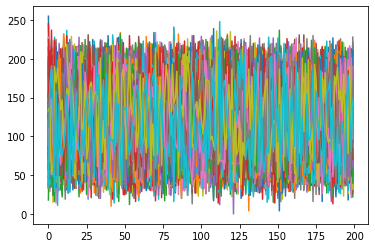

In [0]:
print (im_2)
import matplotlib.pyplot as plt
plt.plot(im_3)
plt.show()
plt.plot(im_2)
plt.show()
plt.plot(im_1)
plt.show()

In [0]:
print (im_3)

[[ 51  33 161 ... 135  49 137]
 [190 160 138 ... 188 133  86]
 [ 99 143 137 ...  36 209 101]
 ...
 [143  78  77 ... 171  98 202]
 [ 70 118 161 ...  73  67  89]
 [179 198 168 ... 190 137 226]]


In [0]:
jsonObject = {
    "invoice_no": [
      {
          "name": "Invoice 21342",
          "start_offset": "10",
          "end_offset": "25"
      }, {
          "name": "Invoice No:",
          "start_offset": "10",
          "end_offset": "25"
      }
    ],
    "invoice_date": [{
        "name": "From day",
        "start_offset": "10",
        "end_offset": "25"
    }]
}

objs = []
for item in jsonObject:
  for list_item in jsonObject[item]:
    # for keys in list_item:
    if list_item["name"] == "Invoice 21342":
        print (list_item)
        
# print (list_item)
      # print (f"(Key,Value)=>({keys}, {list_item[keys]})")
  # print ("Type ",type())
  # # for item_key (item)



{'name': 'Invoice 21342', 'start_offset': '10', 'end_offset': '25'}


In [0]:

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



class Simple(torch.nn.Module):
    def __init__(self):
        super(Simple, self).__init__()
        self.l1 = nn.Linear(2, 2)
        self.l2 = nn.Linear(2, 2)
        self.l3 = nn.Linear(2, 1)

    def forward(self, x): # x has shape (4,32,32,3)
        o1 = F.relu(self.l1(x))
        o2 = F.relu(self.l2(o1))
        o3 = self.l3(o1)
        return o3

net = Simple()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype(np.float32)
y = np.array([0,1,1,0]).astype(np.float32)
x,y = torch.tensor(x,requires_grad=True),torch.tensor(y).view(-1,1)
print (x,y) 
running_loss = 0.0



tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], requires_grad=True) tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [0]:
for i in range(1):
  for j in range(4):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(x[j])
    # print (outputs.shape)
    loss = criterion(outputs, y[j])
    print (x,outputs, y, sep="\n")
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss = loss.item()
print('loss: ' , running_loss)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], requires_grad=True)
tensor([0.3355], grad_fn=<AddBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], requires_grad=True)
tensor([0.3269], grad_fn=<AddBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], requires_grad=True)
tensor([1.], grad_fn=<AddBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], requires_grad=True)
tensor([0.3376], grad_fn=<AddBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
loss:  0.11400672048330307


In [0]:
def init_hidden(batch_size):
    ''' Initializes hidden state '''
    # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
    # initialized to zero, for hidden state and cell state of LSTM
    weight = next(self.parameters()).data

    if (train_on_gpu):
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
              weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
    else:
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

    return hidden

In [0]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
    
# Instantiate the model w/ hyperparams
vocab_size = (100)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(101, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
lr=0.001
train_on_gpu = False
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
h1 = net.init_hidden(64) #+ 3


TypeError: ignored

In [0]:
a1 = (torch.rand(3), torch.rand(3))
print (a1)

(tensor([0.7042, 0.8175, 0.9991]), tensor([0.9857, 0.9363, 0.5325]))


In [0]:
a2 = tuple([each for each in a1])
# for each in h:
#   print (type(each))
print (a2 is a1)

False


In [0]:
import random
import math
def rnd():
        rx = random.uniform(-5,5)
        y = random.random()
        while y >= math.exp(-rx**2):
                y = random.random()
        return rx
for i in range(10):
        x = rnd()
        print(f'{x}')

-2.2648867254398954
1.9495474094191687
4.019525270791208
3.221919260203226
2.583422633956813
0.16922215665126217
-2.2389078084004055
-0.8377894674640318
-3.3603903674330615
1.1325797124960966
